In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import squarify  
# Load the dataset
file_path = '/Users/challalikhithsai/Downloads/Youth_Tobacco_Survey__YTS__Data.csv'


In [3]:
# Display the initial few rows of the dataset
data.head(8)


,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
5,2009,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,2EDU,YTS12,12
6,2001,ID,Idaho,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(43.682630005, -114.363730042)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11
7,2004,VT,Vermont,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(43.625381239, -72.517640791)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS09,9


Data Cleaning:

In [242]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [243]:
# Drop rows with missing values for simplicity
data_cleaned = data.dropna()

# Check data types
data_types = data_cleaned.dtypes
print(data_types)

YEAR                            int64
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              object
Stratificati

In [244]:
# Determine columns with more than 50% missing values
threshold = len(data) * 0.5
columns_to_drop = missing_values[missing_values > threshold].index

# Drop these columns
data_cleaned = data.drop(columns=columns_to_drop)

# Fill remaining missing values (e.g., with median for numerical columns)
data_cleaned = data_cleaned.fillna(data_cleaned.median(numeric_only=True))

# For categorical columns, fill missing values with the mode
for column in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

# Display cleaned data summary
data_cleaned.info()

print(data_cleaned)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10600 non-null  int64  
 1   LocationAbbr           10600 non-null  object 
 2   LocationDesc           10600 non-null  object 
 3   TopicType              10600 non-null  object 
 4   TopicDesc              10600 non-null  object 
 5   MeasureDesc            10600 non-null  object 
 6   DataSource             10600 non-null  object 
 7   Response               10600 non-null  object 
 8   Data_Value_Unit        10600 non-null  object 
 9   Data_Value_Type        10600 non-null  object 
 10  Data_Value             10600 non-null  float64
 11  Data_Value_Std_Err     10600 non-null  float64
 12  Low_Confidence_Limit   10600 non-null  float64
 13  High_Confidence_Limit  10600 non-null  float64
 14  Sample_Size            10600 non-null  float64
 15  Ge

In [245]:
data_cleaned.head(10)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
5,2009,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,2EDU,YTS12,12
6,2001,ID,Idaho,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(43.682630005, -114.363730042)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11
7,2004,VT,Vermont,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(43.625381239, -72.517640791)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS09,9
8,2007,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
9,2006,PA,Pennsylvania,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.793730152, -77.860700294)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8


Exploratory Data Analysis:

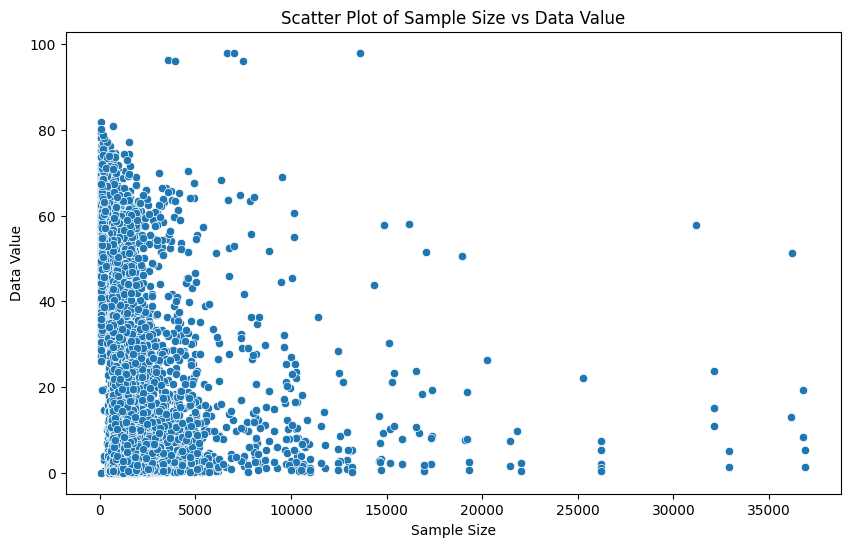

In [246]:
# Visualization 1: Scatter plot of Sample Size vs Data_Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sample_Size', y='Data_Value', data=data)
plt.title('Scatter Plot of Sample Size vs Data Value')
plt.xlabel('Sample Size')
plt.ylabel('Data Value')
plt.show()

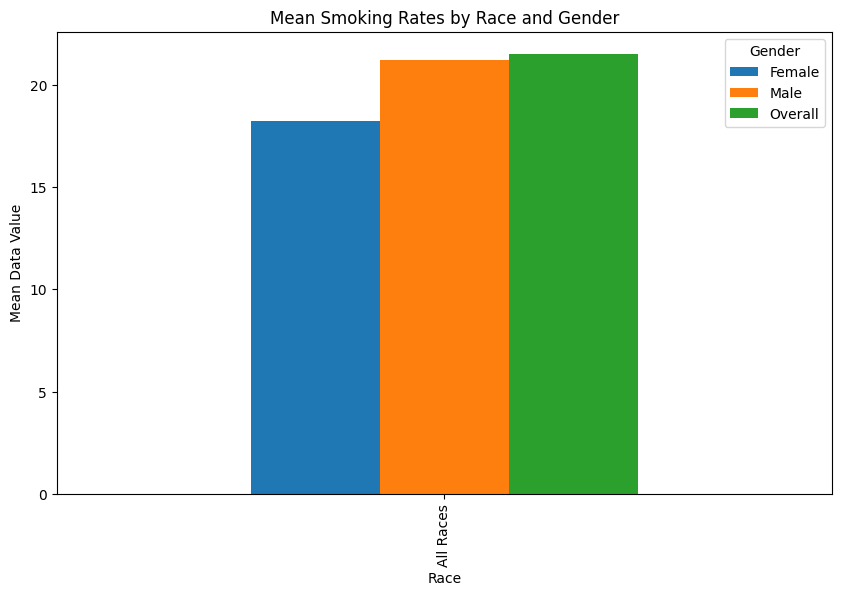

In [247]:
# Visualization 2: Bar Chart of Mean Smoking Rates by Race and Gender
mean_smoking_rates = data.groupby(['Race', 'Gender'])['Data_Value'].mean().unstack()
mean_smoking_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Smoking Rates by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Mean Data Value')
plt.legend(title='Gender')
plt.show()

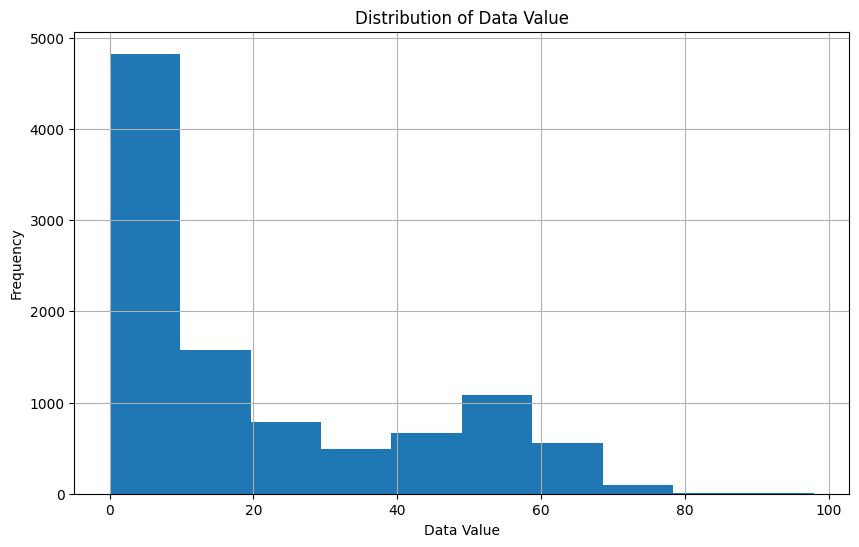

In [248]:
#Visualization 3: histogram 
# Plot the distribution of Data_Value
plt.figure(figsize=(10, 6))
data['Data_Value'].hist(bins=10)
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()


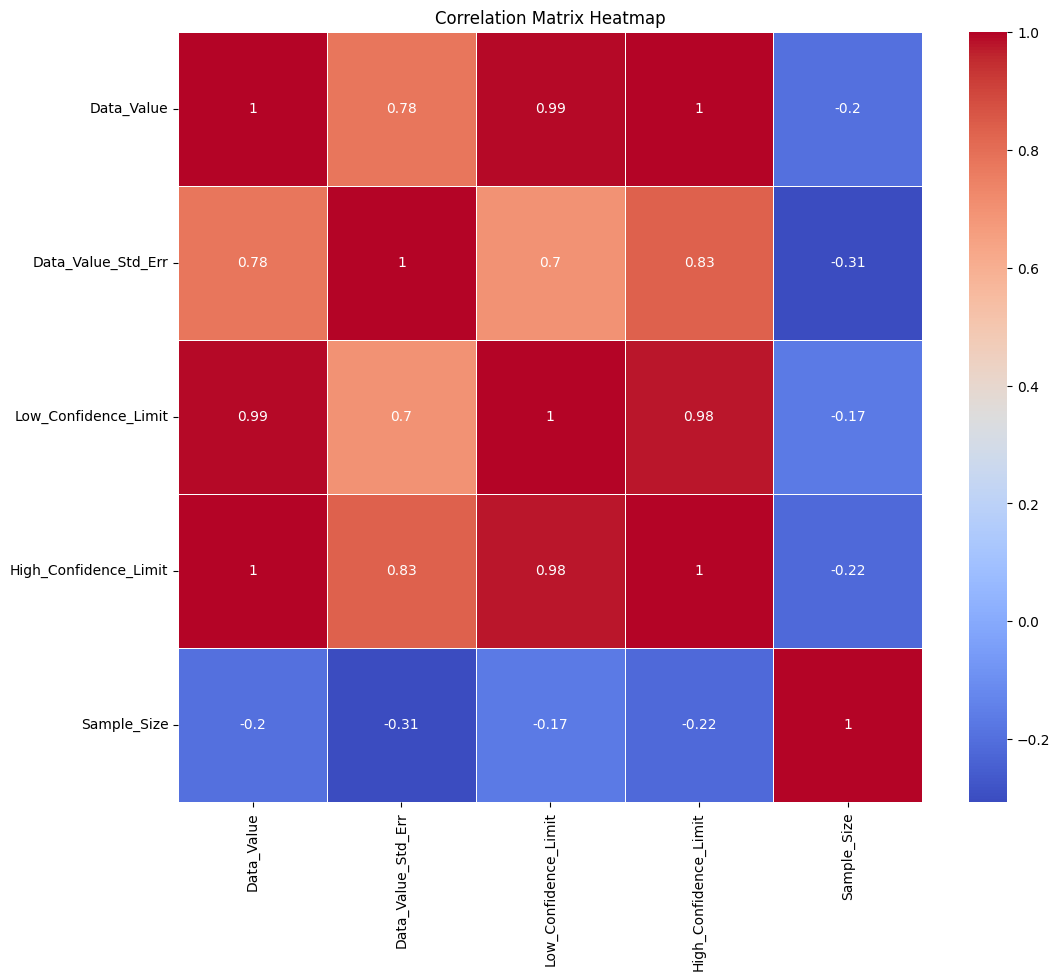

In [249]:
#Visualization 4: Correlation matrix heatmap
# Compute the correlation matrix for numerical variables
corr_matrix = data[['Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


/var/folders/vt/fztm01cs2kvfphvf5vhnd5040000gn/T/ipykernel_1731/2120554590.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='YEAR', y='Data_Value', estimator='mean', ci=None)


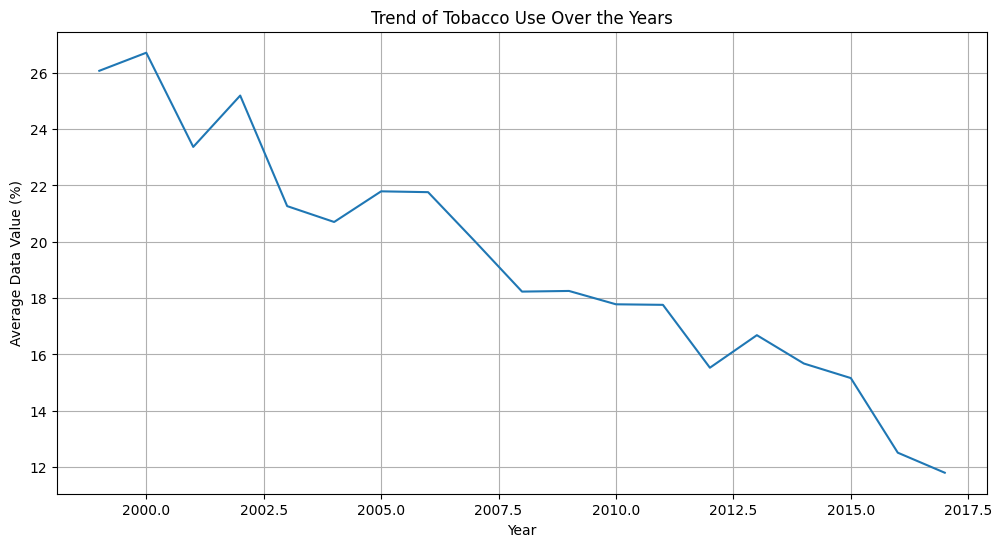

In [250]:
# Visualization 5: Trend of Tobacco Use Over the Years by using 'line plot'
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YEAR', y='Data_Value', estimator='mean', ci=None)
plt.title('Trend of Tobacco Use Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Data Value (%)')
plt.grid(True)
plt.show()

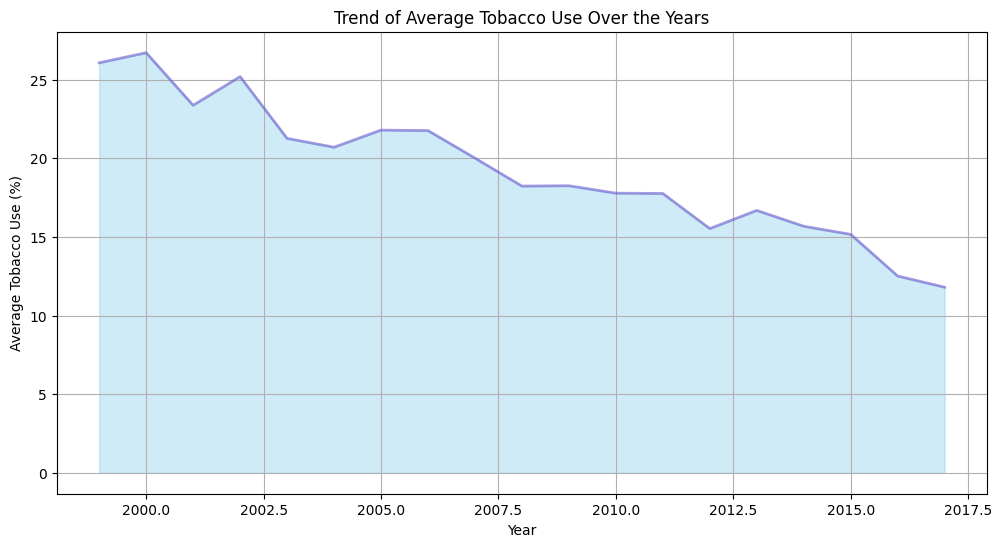

In [251]:
#visualization 6: Trend of average Tobacco use Over the years by using 'Area Chart'
grouped_data = data.groupby('YEAR')['Data_Value'].mean().reset_index()

# Create an area chart
plt.figure(figsize=(12, 6))
plt.fill_between(grouped_data['YEAR'], grouped_data['Data_Value'], color="skyblue", alpha=0.4)
plt.plot(grouped_data['YEAR'], grouped_data['Data_Value'], color="Slateblue", alpha=0.6, linewidth=2)  
plt.title('Trend of Average Tobacco Use Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Tobacco Use (%)')
plt.grid(True)
plt.show()


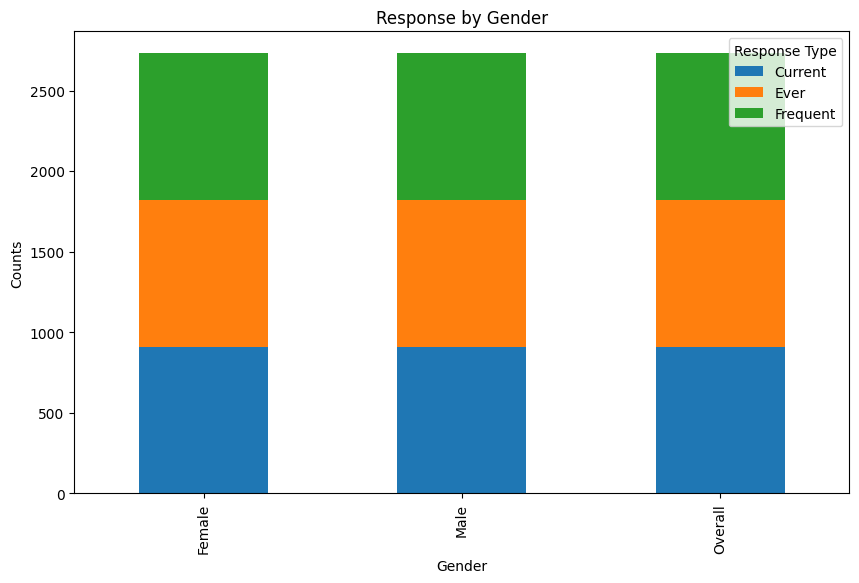

In [252]:
#Visualization 7: stacked bar chart
stacked_data = data.groupby('Gender')['Response'].value_counts().unstack()

# Plotting the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend(title='Response Type')
plt.show()

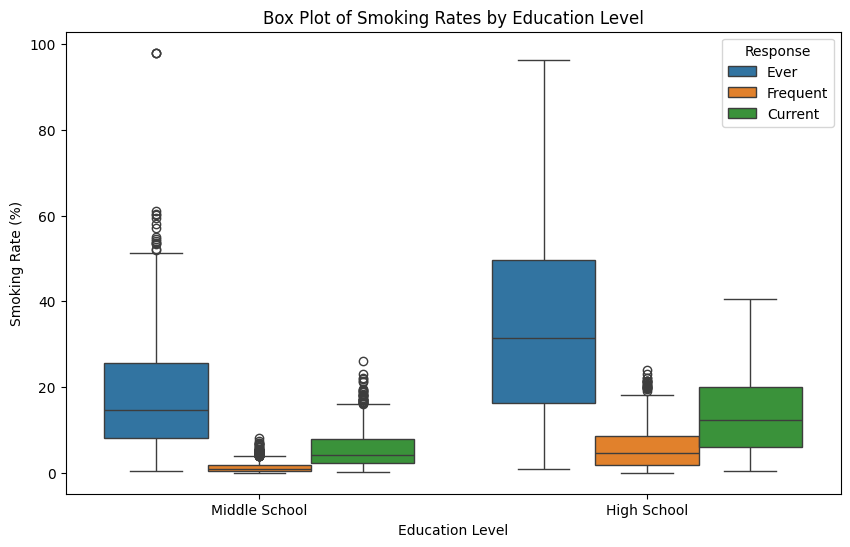

In [253]:
# Visulization 8: Box Plot of Smoking Rates by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education', y='Data_Value', hue='Response')
plt.title('Box Plot of Smoking Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Smoking Rate (%)')
plt.legend(title='Response')

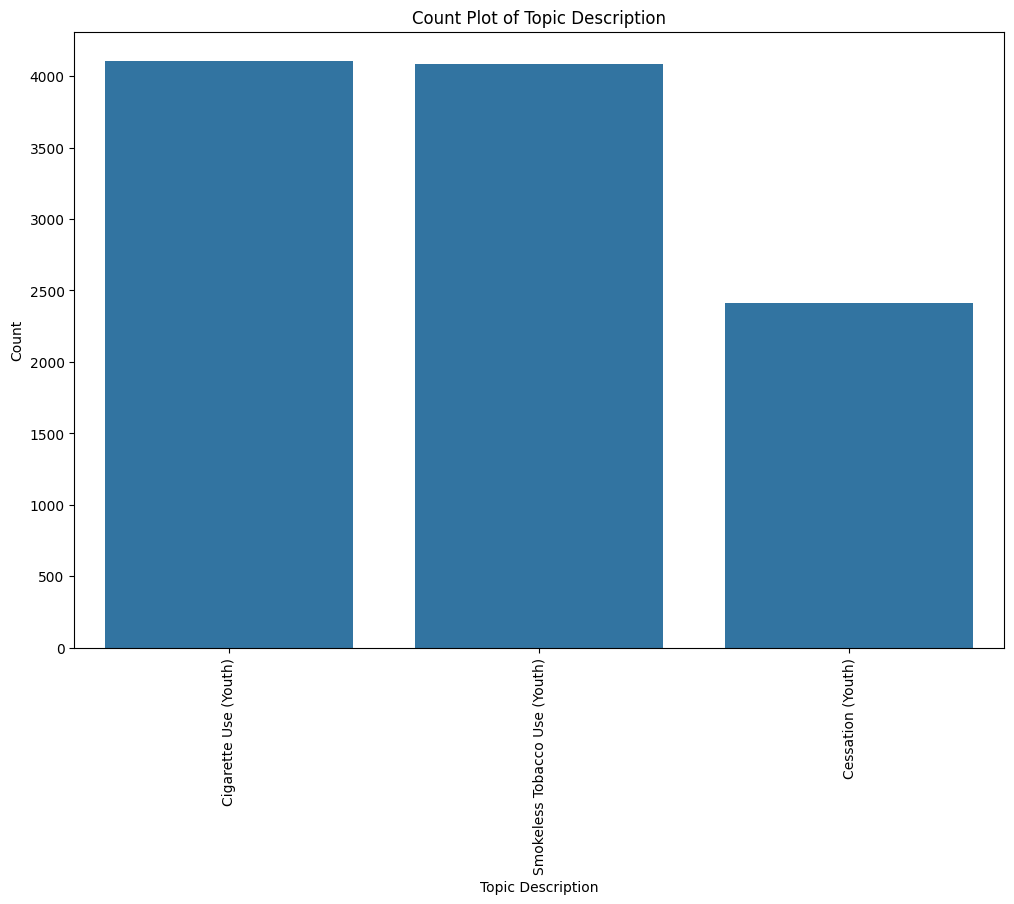

In [254]:
# Visualization 9: Count plot of TopicDescription
plt.figure(figsize=(12, 8))
sns.countplot(x='TopicDesc', data=data)
plt.title('Count Plot of Topic Description')
plt.xlabel('Topic Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

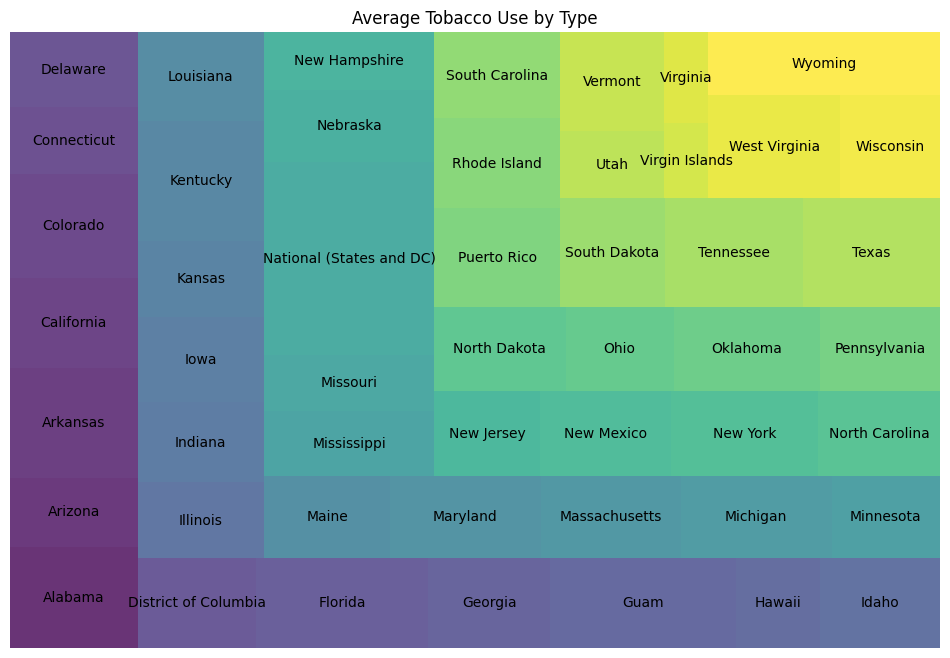

In [255]:
#visulization 10: Tree Map Algorithm
# Group data by 'TopicDesc' and calculate average 'Data_Value'
grouped_data = data.groupby('LocationDesc')['Data_Value'].mean().reset_index()

# Create sizes for the treemap
sizes = grouped_data['Data_Value'].values
labels = grouped_data['LocationDesc'].values

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Average Tobacco Use by Type')
plt.axis('off')  # Turn off axis
plt.show()


Predictive Models:

1. Logistic Regression Models:

In [256]:
# Load the dataset
file_path = '/Users/challalikhithsai/Downloads/YTS_cleaned_data.csv'
df = pd.read_csv(file_path)


# Drop rows with missing target values
data = data.dropna(subset=['Sample_Size'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('Sample_Size', axis=1)
y = data_encoded['Sample_Size']

# Convert the target variable to categorical by binning
y_binned = pd.qcut(y, q=4, labels=False)  # Binning into 4 categories for simplicity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.7157738095238095
Confusion Matrix: 
 [[402  92   8   1]
 [ 33 388  57  11]
 [ 18  90 230 144]
 [  3  35  81 423]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       503
           1       0.64      0.79      0.71       489
           2       0.61      0.48      0.54       482
           3       0.73      0.78      0.75       542

    accuracy                           0.72      2016
   macro avg       0.72      0.71      0.71      2016
weighted avg       0.72      0.72      0.71      2016



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 2. Random Forest Classifier:

In [257]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = pd.read_csv('/Users/challalikhithsai/Downloads/YTS_cleaned_data.csv')

# Drop rows with missing target values
data = data.dropna(subset=['Data_Value_Std_Err'])
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('Data_Value_Std_Err', axis=1)
y = data_encoded['Data_Value_Std_Err']
# Convert the target variable to categorical by binning
y_binned = pd.qcut(y, q=4, labels=False)  # Binning into 4 categories for simplicity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

#Execute the model results
print("Random forest Classifier Accuracy rate :", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report:")
print(report)

Random forest Classifier Accuracy rate : 0.8421383647798742
Confusion Matrix: 
 [[761  58   0   0]
 [ 48 761  82   0]
 [  0 130 492  90]
 [  0   2  92 664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       819
           1       0.80      0.85      0.83       891
           2       0.74      0.69      0.71       712
           3       0.88      0.88      0.88       758

    accuracy                           0.84      3180
   macro avg       0.84      0.84      0.84      3180
weighted avg       0.84      0.84      0.84      3180

